In [1]:
from river.datasets import synth
from river import evaluate
from river import metrics
from river import tree as river_tree

In [2]:
from tree_diff.tree_ruleset_conversion import *
from tree_diff.similar_tree import * 
from tree_diff.conversion import *

In [3]:
model = river_tree.ExtremelyFastDecisionTreeClassifier(
    leaf_prediction = 'mc'
)

In [4]:
gen = synth.Agrawal(classification_function=0, seed=42)

In [5]:
batch1 = iter(gen.take(1000))

In [6]:
metric = metrics.Accuracy()

In [7]:
evaluate.progressive_val_score(batch1, model, metric)

Accuracy: 68.67%

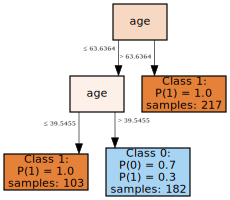

In [8]:
model.draw()

In [9]:
batch1_rules = Ruleset(river_extract_rules(model._root,river_children, river_is_leaf))

In [10]:
batch1_rules

r0: attr_age <= 63.63636363636363 → 1
r1: attr_age <= 63.63636363636363 ˄ attr_age <= 39.54545454545455 → 0
r2: attr_age <= 63.63636363636363 ˄ attr_age <= 39.54545454545455 → 1

In [11]:
model2 = river_tree.HoeffdingTreeClassifier(
    leaf_prediction = 'mc'
)

In [12]:
gen2 = synth.Agrawal(classification_function=0, seed=42)

In [13]:
batch2 = iter(gen2.take(1000))

In [14]:
metric2 = metrics.Accuracy()

In [15]:
evaluate.progressive_val_score(batch2, model2, metric2)

Accuracy: 68.67%

In [16]:
batch2_rules = Ruleset(river_extract_rules(model2._root,river_children, river_is_leaf))

ValueError: NumericBinaryBranch

Bugs:
* VFDT (HoeffdingTreeClassifier) is not supported (type is NumericBinaryBranch rather than EFDTNumericBinaryBranch)